## Install the latest version of BRAILS

In [1]:
pip install git+https://github.com/NHERI-SimCenter/BRAILS

  Cloning https://github.com/NHERI-SimCenter/BRAILS to /tmp/pip-req-build-5drb8xje
  Running command git clone -q https://github.com/NHERI-SimCenter/BRAILS /tmp/pip-req-build-5drb8xje
     |████████████████████████████████| 2.9 MB 8.0 MB/s 
     |████████████████████████████████| 1.0 MB 80.5 MB/s 
     |████████████████████████████████| 87 kB 7.6 MB/s 
     |████████████████████████████████| 125 kB 96.8 MB/s 
     |████████████████████████████████| 431 kB 88.4 MB/s 
     |████████████████████████████████| 11.2 MB 56.5 MB/s 
     |████████████████████████████████| 1.0 MB 71.1 MB/s 
     |████████████████████████████████| 6.3 MB 68.3 MB/s 
     |████████████████████████████████| 63 kB 1.6 MB/s 
     |████████████████████████████████| 16.7 MB 56.3 MB/s 
     |████████████████████████████████| 899 kB 63.1 MB/s 
     |████████████████████████████████| 462 kB 72.8 MB/s 
     |████████████████████████████████| 131 kB 80.4 MB/s 
     |████████████████████████████████| 968 kB 71.6 MB/s 
     |█

## Define the API Key

In [2]:
apikey = 'API-KEY-HERE'

## Check the API Key
If the provided API Key is valid and has all the required APIs (i.e., Geocoding API, Street View Static API, and Maps Static API) enabled, the following code will display 1) coordinates, 2) street-level image, and 3) satellite image of Doe Memorial Library of the University of California, Berkeley.

If you cannot view these outputs, please make sure you have a [valid API key](https://developers.google.com/maps/documentation/embed/get-api-key) and [have Geocoding API, Street View Static API, and Maps Static API enabled](https://support.google.com/googleapi/answer/6158841?hl=en) for this key.

Doe Memorial Library is located at the WGS84 coordinates: 37.8722068, -122.2592367




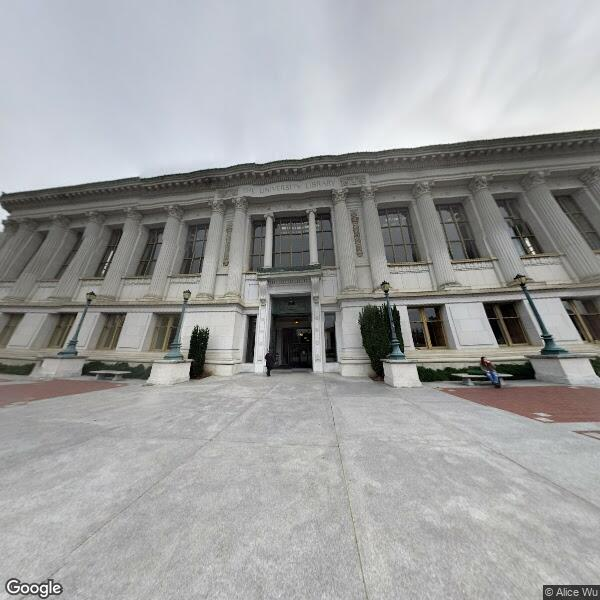

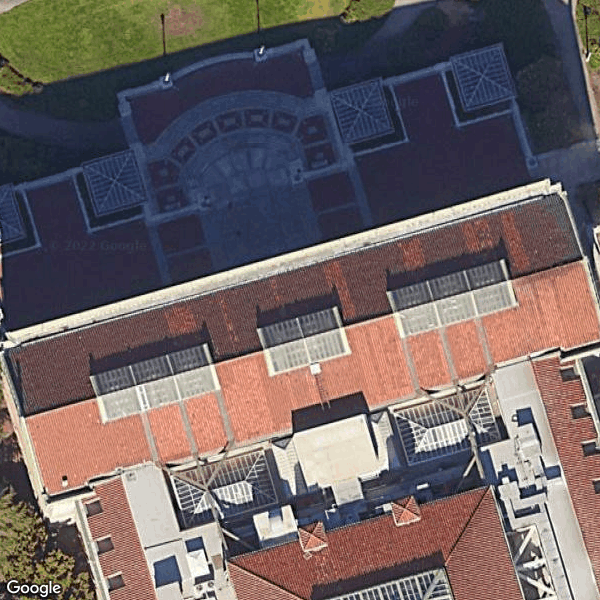

In [3]:
import requests
from IPython.display import Image 

# Show the coordinates in WGS84:
coords = requests.get(f"https://maps.googleapis.com/maps/api/geocode/json?address=190+Doe+Library,+Berkeley,+CA+94720&key={apikey}").json()['results'][0]['geometry']['location']
print(f"Doe Memorial Library is located at the WGS84 coordinates: {coords['lat']}, {coords['lng']}\n\n")

# Download and display the Street View image:
with open('doelibrary_streetview.jpg','wb') as f:
  f.write(requests.get(f"https://maps.googleapis.com/maps/api/streetview?size=600x600&location=37.87251874078189,-122.25960286494328&heading=280&fov=120&pitch=20&key={apikey}").content)
display(Image(filename='doelibrary_streetview.jpg'))

# Download and display the satellite image:
with open('doelibrary_satellite.jpg','wb') as f:
  f.write(requests.get(f"https://maps.googleapis.com/maps/api/staticmap?maptype=satellite&size=600x600&center=37.87251874078189,-122.25960286494328&zoom=20&key={apikey}").content)
display(Image(filename='doelibrary_satellite.jpg'))


## Obtain Inventory Data for the Buildings on University of California, Berkeley Campus

In [5]:
# Import the CityBuilder from BRAILS
from brails.CityBuilder import CityBuilder

# Initialize the CityBuilder
cityBuilder = CityBuilder(attributes=['numstories','roofshape'], 
                   place='University of California, Berkeley', 
                   numBldg=441,
                   footPrints='OSM',
                   GoogleMapAPIKey=apikey,
                   overwrite=True,
                   reDownloadImgs=True)

# Create the city-scale BIM file
BIM = cityBuilder.build()


University of California, Berkeley
Trying to get OSM footprints by the place name University of California, Berkeley.
Footprint saved at tmp/University_of_California__Berkeley_footprints_OSM.geojson
441 buildings found.
Starting downloading images.
Images downloaded ...


/usr/local/lib/python3.7/dist-packages/brails/CityBuilder.py:195: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  self.BIM['Lon'] = self.BIM['geometry'].centroid.x#.round(decimals=6)
/usr/local/lib/python3.7/dist-packages/brails/CityBuilder.py:196: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  self.BIM['Lat'] = self.BIM['geometry'].centroid.y#.round(decimals=6)


Loading default floor detector model file to the models folder...
Default floor detector model loaded.
Performing inferences on images...


 43%|████▎     | 191/441 [00:38<00:57,  4.32it/s]/usr/local/lib/python3.7/dist-packages/brails/modules/NumFloorDetector/NFloorDetector.py:199: RuntimeWarning: divide by zero encountered in double_scalars
  dyOverdx[k,m] = dy/dx
100%|██████████| 441/441 [01:28<00:00,  4.99it/s]



Total execution time: 00:01:40.25
A default roof type model will be used: rooftype_ResNet50_V0.2.
Model found locally: tmp/rooftype_ResNet50_V0.2.h5 
                                                 image prediction  probability
0    tmp/images/TopView/TopViewx-122.259278x37.8756...       flat     0.997696
1    tmp/images/TopView/TopViewx-122.260343x37.8735...       flat     0.999864
2    tmp/images/TopView/TopViewx-122.258374x37.8748...       flat     0.999902
3    tmp/images/TopView/TopViewx-122.258277x37.8745...       flat     0.927669
4    tmp/images/TopView/TopViewx-122.257274x37.8744...     hipped     0.718850
..                                                 ...        ...          ...
436  tmp/images/TopView/TopViewx-122.257842x37.8736...       flat     0.998421
437  tmp/images/TopView/TopViewx-122.254765x37.8706...     hipped     0.972268
438  tmp/images/TopView/TopViewx-122.259171x37.8713...       flat     0.701202
439  tmp/images/TopView/TopViewx-122.264112x37.8657...     

## Show the Obtained Inventory Data in Table View

In [6]:
display(BIM)

,geometry,TopView,StreetView,ID,numStories,roofShape,roofShapeProb
0,"POLYGON ((-122.25941 37.87600, -122.25950 37.8...",tmp/images/TopView/TopViewx-122.259278x37.8756...,tmp/images/StreetView/StreetViewx-122.259278x3...,0,3,flat,0.997696
1,"POLYGON ((-122.26071 37.87358, -122.26062 37.8...",tmp/images/TopView/TopViewx-122.260343x37.8735...,tmp/images/StreetView/StreetViewx-122.260343x3...,1,1,flat,0.999864
2,"POLYGON ((-122.25852 37.87513, -122.25844 37.8...",tmp/images/TopView/TopViewx-122.258374x37.8748...,tmp/images/StreetView/StreetViewx-122.258374x3...,2,1,flat,0.999902
3,"POLYGON ((-122.25867 37.87458, -122.25861 37.8...",tmp/images/TopView/TopViewx-122.258277x37.8745...,tmp/images/StreetView/StreetViewx-122.258277x3...,3,1,flat,0.927669
4,"POLYGON ((-122.25766 37.87460, -122.25756 37.8...",tmp/images/TopView/TopViewx-122.257274x37.8744...,tmp/images/StreetView/StreetViewx-122.257274x3...,4,2,hipped,0.718850
...,...,...,...,...,...,...,...
436,"POLYGON ((-122.25802 37.87349, -122.25804 37.8...",tmp/images/TopView/TopViewx-122.257842x37.8736...,tmp/images/StreetView/StreetViewx-122.257842x3...,436,2,flat,0.998421
437,"POLYGON ((-122.25488 37.87098, -122.25474 37.8...",tmp/images/TopView/TopViewx-122.254765x37.8706...,tmp/images/StreetView/StreetViewx-122.254765x3...,437,1,hipped,0.972268
438,"POLYGON ((-122.25889 37.87154, -122.25892 37.8...",tmp/images/TopView/TopViewx-122.259171x37.8713...,tmp/images/StreetView/StreetViewx-122.259171x3...,438,1,flat,0.701202
439,"POLYGON ((-122.26421 37.86592, -122.26412 37.8...",tmp/images/TopView/TopViewx-122.264112x37.8657...,tmp/images/StreetView/StreetViewx-122.264112x3...,439,1,flat,0.997456
